In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('smrai3_results.csv')
df

,model,feature,mae,nmae,R
0,smrai2,pot,4.100,0.34,0.87
1,smrai2,fac,0.070,0.40,0.73
2,smrai2,sxx,0.480,0.29,0.92
3,smrai2,syy,0.470,0.29,0.92
4,smrai2,sxy,0.940,0.33,0.84
5,smrai3,pot,4.400,0.36,0.80
6,smrai3,fac,0.035,0.35,0.72
7,smrai3,sxx,0.230,0.15,0.94
8,smrai3,syy,0.610,0.20,0.89
9,smrai3,sxy,NaN,NaN,NaN


<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_38384/1124970751.py:9: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_xticklabels(['Pot\n[kV]','FAC\n[$\mathrm{\mu}$A/m$^2$]','Sx\n[S/m]','Sy\n[S/m]','Sxy\n[S/m]'],rotation=0)
/tmp/ipykernel_38384/1124970751.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Pot\n[kV]','FAC\n[$\mathrm{\mu}$A/m$^2$]','Sx\n[S/m]','Sy\n[S/m]','Sxy\n[S/m]'],rotation=0)
/tmp/ipykernel_38384/1124970751.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Pot','FAC','Sx','Sy','Sxy'],rotation=0)
/tmp/ipykernel_38384/1124970751.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xtic

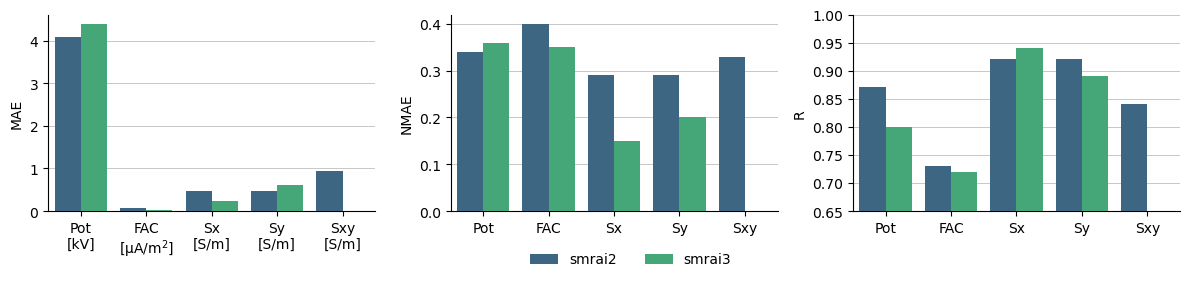

In [4]:
figs, ax = plt.subplots(1, 3, figsize=(12, 3), sharex=False)
ax = ax.flatten()

pall = 'viridis'
sns.barplot(data=df, x='feature', y='mae',ax=ax[0],hue='model',palette=pall,legend=False, zorder = 3)
ax[0].set_ylabel('MAE')
ax[0].set_xlabel(' ')
#ax[0].set_yscale('log')
ax[0].set_xticklabels(['Pot\n[kV]','FAC\n[$\mathrm{\mu}$A/m$^2$]','Sx\n[S/m]','Sy\n[S/m]','Sxy\n[S/m]'],rotation=0)

sns.barplot(data=df, x='feature', y='nmae',ax=ax[1],hue='model',palette=pall,legend=True, zorder = 3)
ax[1].set_ylabel('NMAE')
ax[1].set_xlabel(' ')
ax[1].get_legend().remove()
ax[1].set_xticklabels(['Pot','FAC','Sx','Sy','Sxy'],rotation=0)

sns.barplot(data=df, x='feature', y='R',ax=ax[2],hue='model',palette=pall,legend=False, zorder = 3)
ax[2].set_ylabel('R')
ax[2].set_xlabel(' ')
ax[2].set_yticks(np.arange(0.65,1.1,0.05))
ax[2].set_ylim(0.65,1.0)
ax[2].set_xticklabels(['Pot','FAC','Sx','Sy','Sxy'],rotation=0)


#horizontal legend at the bottom
handles, labels = ax[1].get_legend_handles_labels()
figs.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.53, 0.05),frameon=False)

for axs in ax:
    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)
    axs.grid(axis='y', linestyle='-', alpha=1, zorder=0, linewidth=0.5)


plt.tight_layout()
plt.savefig('smrai3_results.png',dpi=500)